In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
od=pd.read_csv('order_details.csv')

In [3]:
od.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [4]:
od.shape

(48620, 4)

In [5]:
order=pd.read_csv('orders.csv')
order.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [6]:
order.shape

(21350, 3)

In [7]:
pt=pd.read_csv('pizza_types.csv', encoding = 'unicode_escape')

In [8]:
pt.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [9]:
pt.shape

(32, 4)

In [10]:
pi=pd.read_csv('pizzas.csv')

In [11]:
pi.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [12]:
pi.shape

(96, 4)

In [13]:
final_od = pd.merge(od,order, on='order_id', how='left')

In [14]:
final_od.head()

,order_details_id,order_id,pizza_id,quantity,date,time
0,1,1,hawaiian_m,1,2015-01-01,11:38:36
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40
2,3,2,five_cheese_l,1,2015-01-01,11:57:40
3,4,2,ital_supr_l,1,2015-01-01,11:57:40
4,5,2,mexicana_m,1,2015-01-01,11:57:40


In [15]:
final_p = pd.merge(pi, pt, on='pizza_type_id', how='left')

In [16]:
final_p.head()

,pizza_id,pizza_type_id,size,price,name,category,ingredients
0,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,bbq_ckn_m,bbq_ckn,M,16.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
2,bbq_ckn_l,bbq_ckn,L,20.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
3,cali_ckn_s,cali_ckn,S,12.75,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
4,cali_ckn_m,cali_ckn,M,16.75,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."


In [17]:
final_p.isnull().sum()

pizza_id         0
pizza_type_id    0
size             0
price            0
name             0
category         0
ingredients      0
dtype: int64

In [18]:
df=pd.merge(final_od, final_p, on='pizza_id', how='left')

In [19]:
df.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  48620 non-null  int64  
 1   order_id          48620 non-null  int64  
 2   pizza_id          48620 non-null  object 
 3   quantity          48620 non-null  int64  
 4   date              48620 non-null  object 
 5   time              48620 non-null  object 
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.8+ MB


In [21]:
data_dict = pd.read_csv('data_dictionary.csv')
pd.set_option('display.max_colwidth',None) # to show full discription 
data_dict

,Table,Field,Description
0,orders,order_id,Unique identifier for each order placed by a table
1,orders,date,Date the order was placed (entered into the system prior to cooking & serving)
2,orders,time,Time the order was placed (entered into the system prior to cooking & serving)
3,order_details,order_details_id,"Unique identifier for each pizza placed within each order (pizzas of the same type and size are kept in the same row, and the quantity increases)"
4,order_details,order_id,Foreign key that ties the details in each order to the order itself
5,order_details,pizza_id,"Foreign key that ties the pizza ordered to its details, like size and price"
6,order_details,quantity,Quantity ordered for each pizza of the same type and size
7,pizzas,pizza_id,Unique identifier for each pizza (constituted by its type and size)
8,pizzas,pizza_type_id,Foreign key that ties each pizza to its broader pizza type
9,pizzas,size,"Size of the pizza (Small, Medium, Large, X Large, or XX Large)"


In [22]:
df.drop('order_details_id',axis=1, inplace=True)

In [23]:
df.drop('pizza_id', axis=1, inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48620 entries, 0 to 48619
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       48620 non-null  int64  
 1   quantity       48620 non-null  int64  
 2   date           48620 non-null  object 
 3   time           48620 non-null  object 
 4   pizza_type_id  48620 non-null  object 
 5   size           48620 non-null  object 
 6   price          48620 non-null  float64
 7   name           48620 non-null  object 
 8   category       48620 non-null  object 
 9   ingredients    48620 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 4.1+ MB


In [25]:
df.rename({'pizza_type_id':'pizza_id'}, axis=1, inplace=True)

In [26]:
df.head()

,order_id,quantity,date,time,pizza_id,size,price,name,category,ingredients
0,1,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers, Bacon"
2,2,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Gouda Cheese, Romano Cheese, Blue Cheese, Garlic"
3,2,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Onions, Green Olives, Garlic"
4,2,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red Onions, Cilantro, Corn, Chipotle Sauce, Garlic"


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48620 entries, 0 to 48619
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   order_id     48620 non-null  int64  
 1   quantity     48620 non-null  int64  
 2   date         48620 non-null  object 
 3   time         48620 non-null  object 
 4   pizza_id     48620 non-null  object 
 5   size         48620 non-null  object 
 6   price        48620 non-null  float64
 7   name         48620 non-null  object 
 8   category     48620 non-null  object 
 9   ingredients  48620 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 4.1+ MB


In [28]:
df.rename({'quantity':'pizza_quantity',
           'date':'order_date',
           'time':'order_time',
           'size':'pizza_size',
           'price':'pizza_price',
           'name':'pizza_name',
           'category':'pizza_category',
           'ingredients':'pizza_ingredients'}, axis=1, inplace=True)

In [29]:
df.head()

,order_id,pizza_quantity,order_date,order_time,pizza_id,pizza_size,pizza_price,pizza_name,pizza_category,pizza_ingredients
0,1,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers, Bacon"
2,2,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Gouda Cheese, Romano Cheese, Blue Cheese, Garlic"
3,2,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Onions, Green Olives, Garlic"
4,2,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red Onions, Cilantro, Corn, Chipotle Sauce, Garlic"


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48620 entries, 0 to 48619
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_id           48620 non-null  int64  
 1   pizza_quantity     48620 non-null  int64  
 2   order_date         48620 non-null  object 
 3   order_time         48620 non-null  object 
 4   pizza_id           48620 non-null  object 
 5   pizza_size         48620 non-null  object 
 6   pizza_price        48620 non-null  float64
 7   pizza_name         48620 non-null  object 
 8   pizza_category     48620 non-null  object 
 9   pizza_ingredients  48620 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 4.1+ MB


In [52]:
# Top selling category of pizza
top_selling_category = df.pizza_category.value_counts(normalize=True)*100
top_selling_category   

Classic    29.985603
Supreme    24.222542
Veggie     23.547923
Chicken    22.243933
Name: pizza_category, dtype: float64

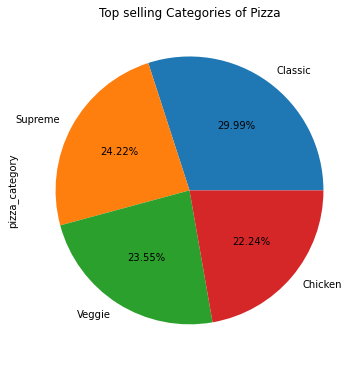

In [67]:
# visualize top_selling_category
plt.figure(figsize=(6,15))
top_selling_category.plot.pie(autopct='%1.2f%%')
plt.title('Top selling Categories of Pizza')
plt.show()

### `OBSERVATION 1`
- __classic__ is most selling category where as __chicken__ is less selling category.

In [58]:
# most prefer size of pizza
most_preferred_size = df.pizza_size.value_counts()
most_preferred_size

L      18526
M      15385
S      14137
XL       544
XXL       28
Name: pizza_size, dtype: int64

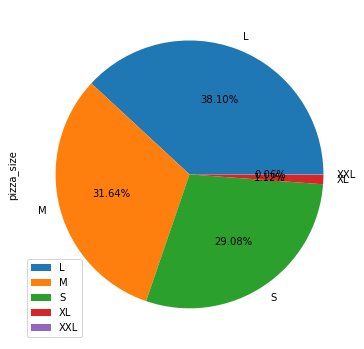

In [85]:
# visualize top_selling_category
plt.figure(figsize=(6,16))
most_preferred_size.plot.pie(autopct='%1.2f%%')
plt.legend(loc=3)
plt.show()

### `OBSERVATION 2`
- customer are prefer __L__ size of pizza most.

In [89]:
# top 5 most selling pizza  
df.pizza_name.value_counts()[:5]

The Classic Deluxe Pizza      2416
The Barbecue Chicken Pizza    2372
The Hawaiian Pizza            2370
The Pepperoni Pizza           2369
The Thai Chicken Pizza        2315
Name: pizza_name, dtype: int64

In [ ]:
# least selling pizza  
df.pizza_name.value_counts()[-1:]

The Brie Carre Pizza    480
Name: pizza_name, dtype: int64

### `OBSERVATION 3`
- __The Classic Deluxe Pizza__ is the top selling pizza where as __The Brie Carre Pizza__ is least selling.

In [ ]:
df_2 = df.groupby('order_id').sum().reset_index()
df_2

,order_id,pizza_quantity,pizza_price
0,1,1,13.25
1,2,5,92.00
2,3,2,37.25
3,4,1,16.50
4,5,1,16.50
...,...,...,...
21345,21346,4,62.25
21346,21347,4,66.50
21347,21348,3,46.70
21348,21349,1,20.25


In [ ]:
df_2.mean()

order_id          10675.500000
pizza_quantity        2.321967
pizza_price          37.561813
dtype: float64

### `OBSERVATION 4`
- the average selling price of pizza is 37$ with quantity of 2 pizzas.

In [90]:
df['order_date'] = pd.to_datetime(df['order_date'])

In [91]:
df['order_month'] = df['order_date'].dt.month

In [92]:
df.tail()

,order_id,pizza_quantity,order_date,order_time,pizza_id,pizza_size,pizza_price,pizza_name,pizza_category,pizza_ingredients,order_month
48615,21348,1,2015-12-31,21:23:10,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, Asiago Cheese, Alfredo Sauce",12
48616,21348,1,2015-12-31,21:23:10,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mozzarella Cheese, Parmigiano Reggiano Cheese, Garlic",12
48617,21348,1,2015-12-31,21:23:10,napolitana,S,12.00,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions, Garlic",12
48618,21349,1,2015-12-31,22:09:54,mexicana,L,20.25,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red Onions, Cilantro, Corn, Chipotle Sauce, Garlic",12
48619,21350,1,2015-12-31,23:02:05,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce",12


In [93]:
df['weekday']= df['order_date'].dt.weekday

In [100]:
dws = df.groupby('weekday').sum().sort_values('pizza_price', ascending=False).rename({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}, axis=0)
day_wise_summary = dws.drop("order_id", axis=1)
day_wise_summary

,pizza_quantity,pizza_price,order_month
weekday,,,
Friday,8242,133773.90,51694
Thursday,7478,120912.45,48435
Saturday,7493,120865.30,47465
Wednesday,6946,112006.45,44439
Tuesday,6895,111764.70,43526
Monday,6485,105357.15,39770
Sunday,6035,97264.75,38325


### `OBSERVATION 5`
- Customers prefer to eat pizza on __Fridays__, but not on Sundays. 

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_id           48620 non-null  int64         
 1   pizza_quantity     48620 non-null  int64         
 2   order_date         48620 non-null  datetime64[ns]
 3   order_time         48620 non-null  object        
 4   pizza_id           48620 non-null  object        
 5   pizza_size         48620 non-null  object        
 6   pizza_price        48620 non-null  float64       
 7   pizza_name         48620 non-null  object        
 8   pizza_category     48620 non-null  object        
 9   pizza_ingredients  48620 non-null  object        
 10  order_month        48620 non-null  int64         
 11  weekday            48620 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 4.8+ MB


In [103]:
df['order_time'] = pd.to_datetime(df['order_time'])

In [112]:
df['hour']= df['order_time'].dt.hour

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48620 entries, 0 to 48619
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_id           48620 non-null  int64         
 1   pizza_quantity     48620 non-null  int64         
 2   order_date         48620 non-null  datetime64[ns]
 3   order_time         48620 non-null  datetime64[ns]
 4   pizza_id           48620 non-null  object        
 5   pizza_size         48620 non-null  object        
 6   pizza_price        48620 non-null  float64       
 7   pizza_name         48620 non-null  object        
 8   pizza_category     48620 non-null  object        
 9   pizza_ingredients  48620 non-null  object        
 10  order_month        48620 non-null  int64         
 11  weekday            48620 non-null  int64         
 12  hour               48620 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(5), object(5)
memory 

In [143]:
# peak order time 
df3 = (df['hour'].value_counts(normalize=True)*100).reset_index().rename({'index':'hour', 'hour':'percentage'},axis=1)
df3

,hour,percentage
0,12,13.457425
1,13,12.758124
2,18,11.022213
3,17,10.577951
4,19,8.946935
5,16,8.607569
6,14,7.241876
7,20,7.171946
8,15,6.519951
9,11,5.495681


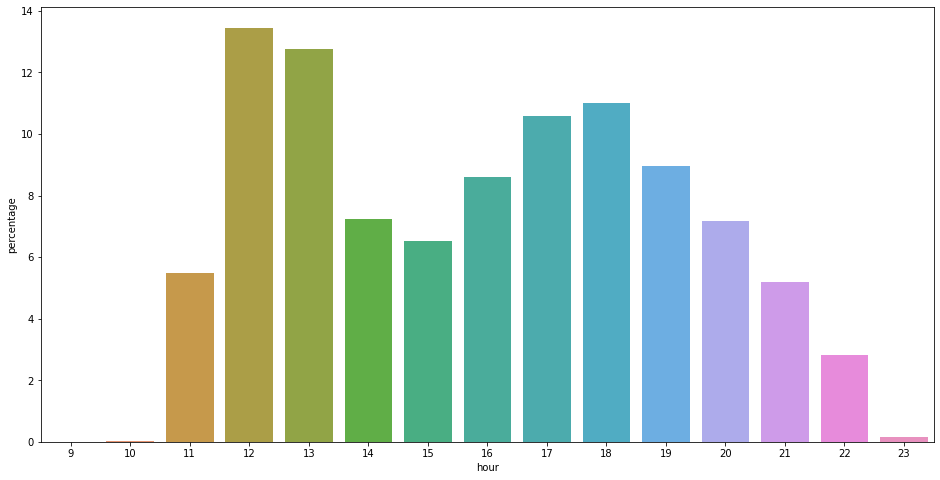

In [147]:
plt.figure(figsize=[16,8])
sns.barplot(data=df3, x='hour', y='percentage')
plt.show()

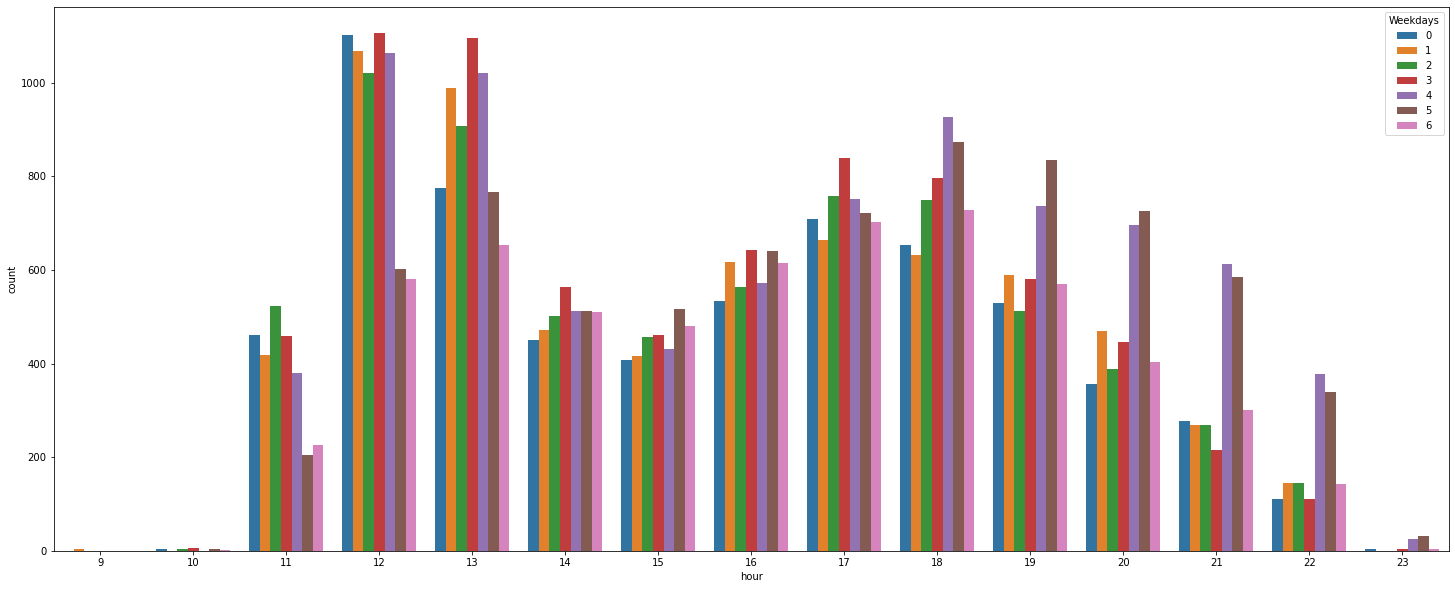

In [138]:
# weekday wise peak hour  
plt.figure(figsize=[25,10])
sns.countplot(data=df, x='hour', hue='weekday')
plt.legend(loc=1, title='Weekdays')
plt.show()